In [100]:
# Import Libraries
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt

import datetime as dt
import yfinance as yf
import pandas_datareader as pdr

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [54]:
# Get GBP Training Data
start = dt.datetime(2015,1,1)
end = dt.datetime(2020,6,30)
gbp_train = pdr.DataReader('gbpusd=x', 'yahoo', start, end)['Adj Close']

In [55]:
# Get GBP Test Data
start = dt.datetime(2020,7,1)
end = dt.datetime(2020,12,31)
gbp_test = pdr.DataReader('gbpusd=x', 'yahoo', start, end)['Adj Close']

In [44]:
# Put data into Numpy format
gbp_train = np.array(gbp_train)
gbp_test = np.array(gbp_test)

In [49]:
# Function to turn time series into array of sequences
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [51]:
# Define number of previous time steps to include for each prediction
# Number of features is 1 in the univariate case
n_steps = 10
n_features = 1

In [45]:
# Run above split sequence function on data
xtrain, ytrain = split_sequence(gbp_train, n_steps)
xtest, ytest = split_sequence(gbp_test, n_steps)

In [56]:
# Put data into format for model fitting (# Obs, Time Step Interval, Number of features)
xtrain = xtrain.reshape((xtrain.shape[0], xtrain.shape[1], n_features))
xtest = xtest.reshape((xtest.shape[0], xtest.shape[1], n_features))

In [105]:
# Set up the LSTM
model = Sequential()
model.add(LSTM(25, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(25, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [106]:
# Fit the model with the training data set
model.fit(xtrain, ytrain, epochs=10, verbose=1, batch_size=1)

Epoch 1/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0605
Epoch 2/10
1407/1407 [==============================] - 4s 3ms/step - loss: 4.3867e-04
Epoch 3/10
1407/1407 [==============================] - 4s 3ms/step - loss: 4.6037e-04
Epoch 4/10
1407/1407 [==============================] - 4s 3ms/step - loss: 5.4846e-04
Epoch 5/10
1407/1407 [==============================] - 4s 3ms/step - loss: 5.6423e-04
Epoch 6/10
1407/1407 [==============================] - 4s 3ms/step - loss: 4.4394e-04
Epoch 7/10
1407/1407 [==============================] - 4s 3ms/step - loss: 5.9005e-04
Epoch 8/10
1407/1407 [==============================] - 4s 3ms/step - loss: 4.9593e-04
Epoch 9/10
1407/1407 [==============================] - 4s 3ms/step - loss: 4.8803e-04
Epoch 10/10
1407/1407 [==============================] - 4s 3ms/step - loss: 4.5599e-04


In [107]:
ypred = model.predict(xtest)

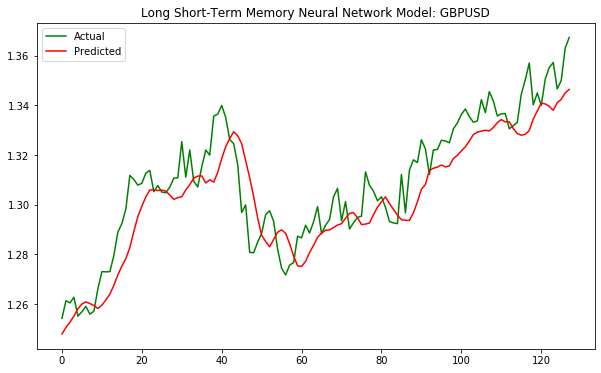

In [108]:
# Visualizing the results
plt.figure(figsize=(10,6))
plt.title('Long Short-Term Memory Neural Network Model: GBPUSD')
plt.plot(ytest, label = 'Actual', color = 'g')
plt.plot(ypred , label = 'Predicted', color = 'r')
plt.legend()

In [109]:
print(mean_squared_error(ytest, ypred))

0.00015384845685406656


In [110]:
print(mean_absolute_error(ytest, ypred))

0.010148203931748867
